0.6331 0.7146


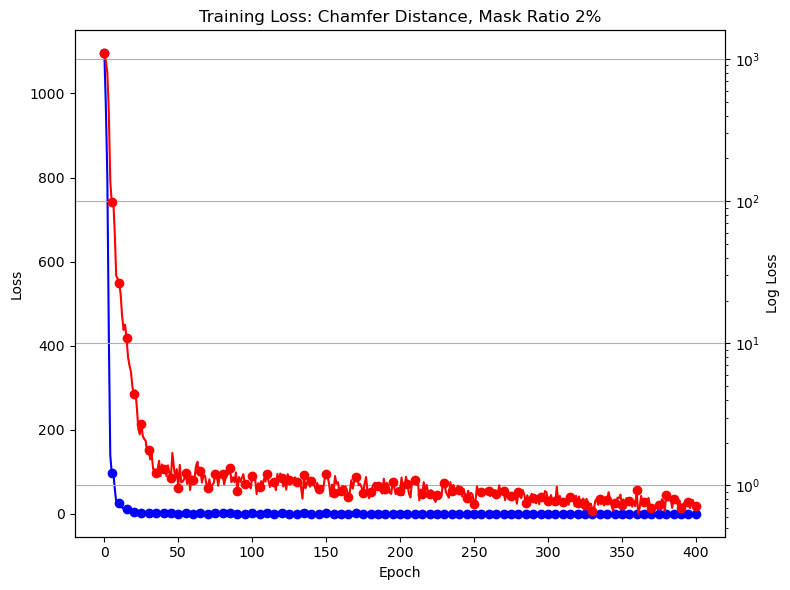

In [5]:
#%%
import matplotlib.pyplot as plt

log_file = '/global/cfs/projectdirs/dune/www/data/2x2/simulation/silentc_work/point_mae/Point-MAE/experiments/edepsim_pretrain/cfgs/train_on_one_npy_file/20231211_092321.log'  # Replace 'path_to_your_log_file.log' with the actual path

losses = []
epochs = []

with open(log_file, 'r') as file:
    for line in file:
        if ' - [Training] EPOCH:' in line:
            epoch_info = line.split(' - [Training] EPOCH:')[1]
            epoch, loss = epoch_info.split(' Losses = ')[0].split(' ')[1], epoch_info.split(' Losses = ')[1]
            epoch = int(epoch)
            loss = float(loss.split()[0].strip("[]'"))
            epochs.append(epoch)
            losses.append(loss)

plt.figure(figsize=(8, 6))
ax1 = plt.gca()
ax1.plot(epochs, losses, marker='o', linestyle='-', color='b', markevery=5)
ax1.set_title('Training Loss: Chamfer Distance, Mask Ratio 2%')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Loss')
print(min(losses), losses[-1])

# Creating a twin y-axis for logarithmic scale
ax2 = ax1.twinx()
ax2.semilogy(epochs, losses, marker='o', linestyle='-', color='r', markevery=5)
ax2.set_ylabel('Log Loss')
ax2.set_yscale('log')

plt.grid(True)
plt.tight_layout()
plt.savefig('/global/cfs/projectdirs/dune/www/data/2x2/simulation/silentc_work/point_mae/Point-MAE/experiments/edepsim_pretrain/cfgs/train_on_one_npy_file/loss_log.png')
plt.show()

#%%


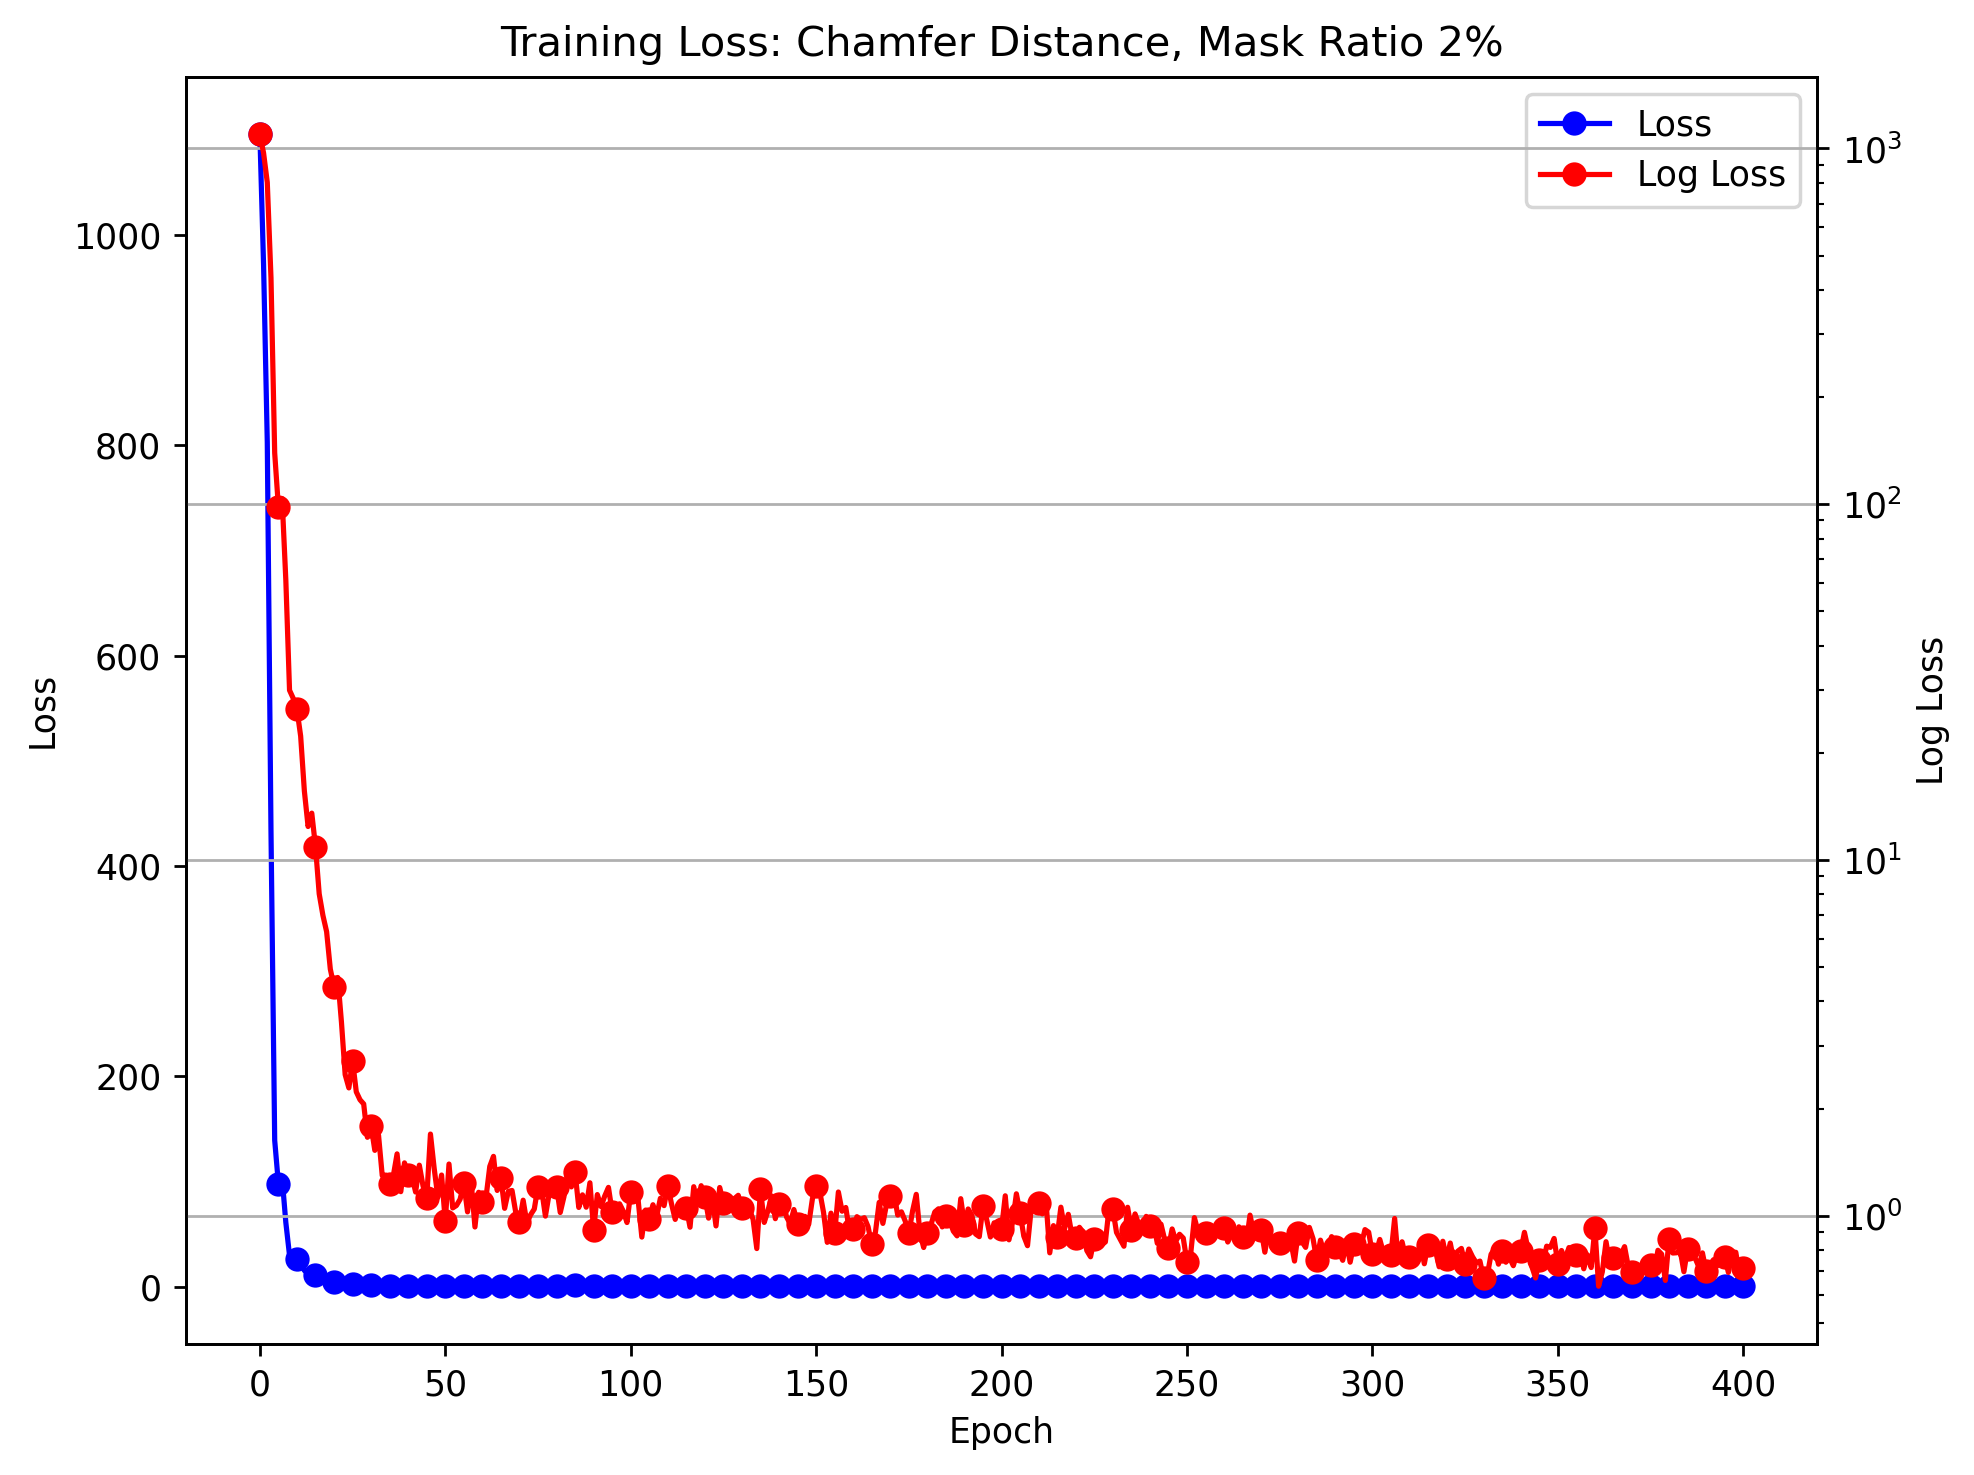

In [4]:
import matplotlib.pyplot as plt

# Your existing code to read data and plot the graph

plt.figure(figsize=(8, 6), dpi=250)  # Set DPI to 250
ax1 = plt.gca()

# Plotting with markers every 5 epochs
plot1, = ax1.plot(epochs, losses, marker='o', linestyle='-', color='b', markevery=5, label='Loss')
ax1.set_title('Training Loss: Chamfer Distance, Mask Ratio 2%')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Loss')

# Creating a twin y-axis for logarithmic scale
ax2 = ax1.twinx()
plot2, = ax2.semilogy(epochs, losses, marker='o', linestyle='-', color='r', markevery=5, label='Log Loss')
ax2.set_ylabel('Log Loss')
ax2.set_yscale('log')

# Combine the legends from both axes
plots = [plot1, plot2]
labels = [plot.get_label() for plot in plots]
ax1.legend(plots, labels, loc='upper right')  # Adjust location as needed

plt.grid(True)
plt.tight_layout()
plt.savefig('/global/cfs/projectdirs/dune/www/data/2x2/simulation/silentc_work/point_mae/Point-MAE/experiments/edepsim_pretrain/cfgs/train_on_one_npy_file/loss_log.png')
plt.show()


401 401 401 401


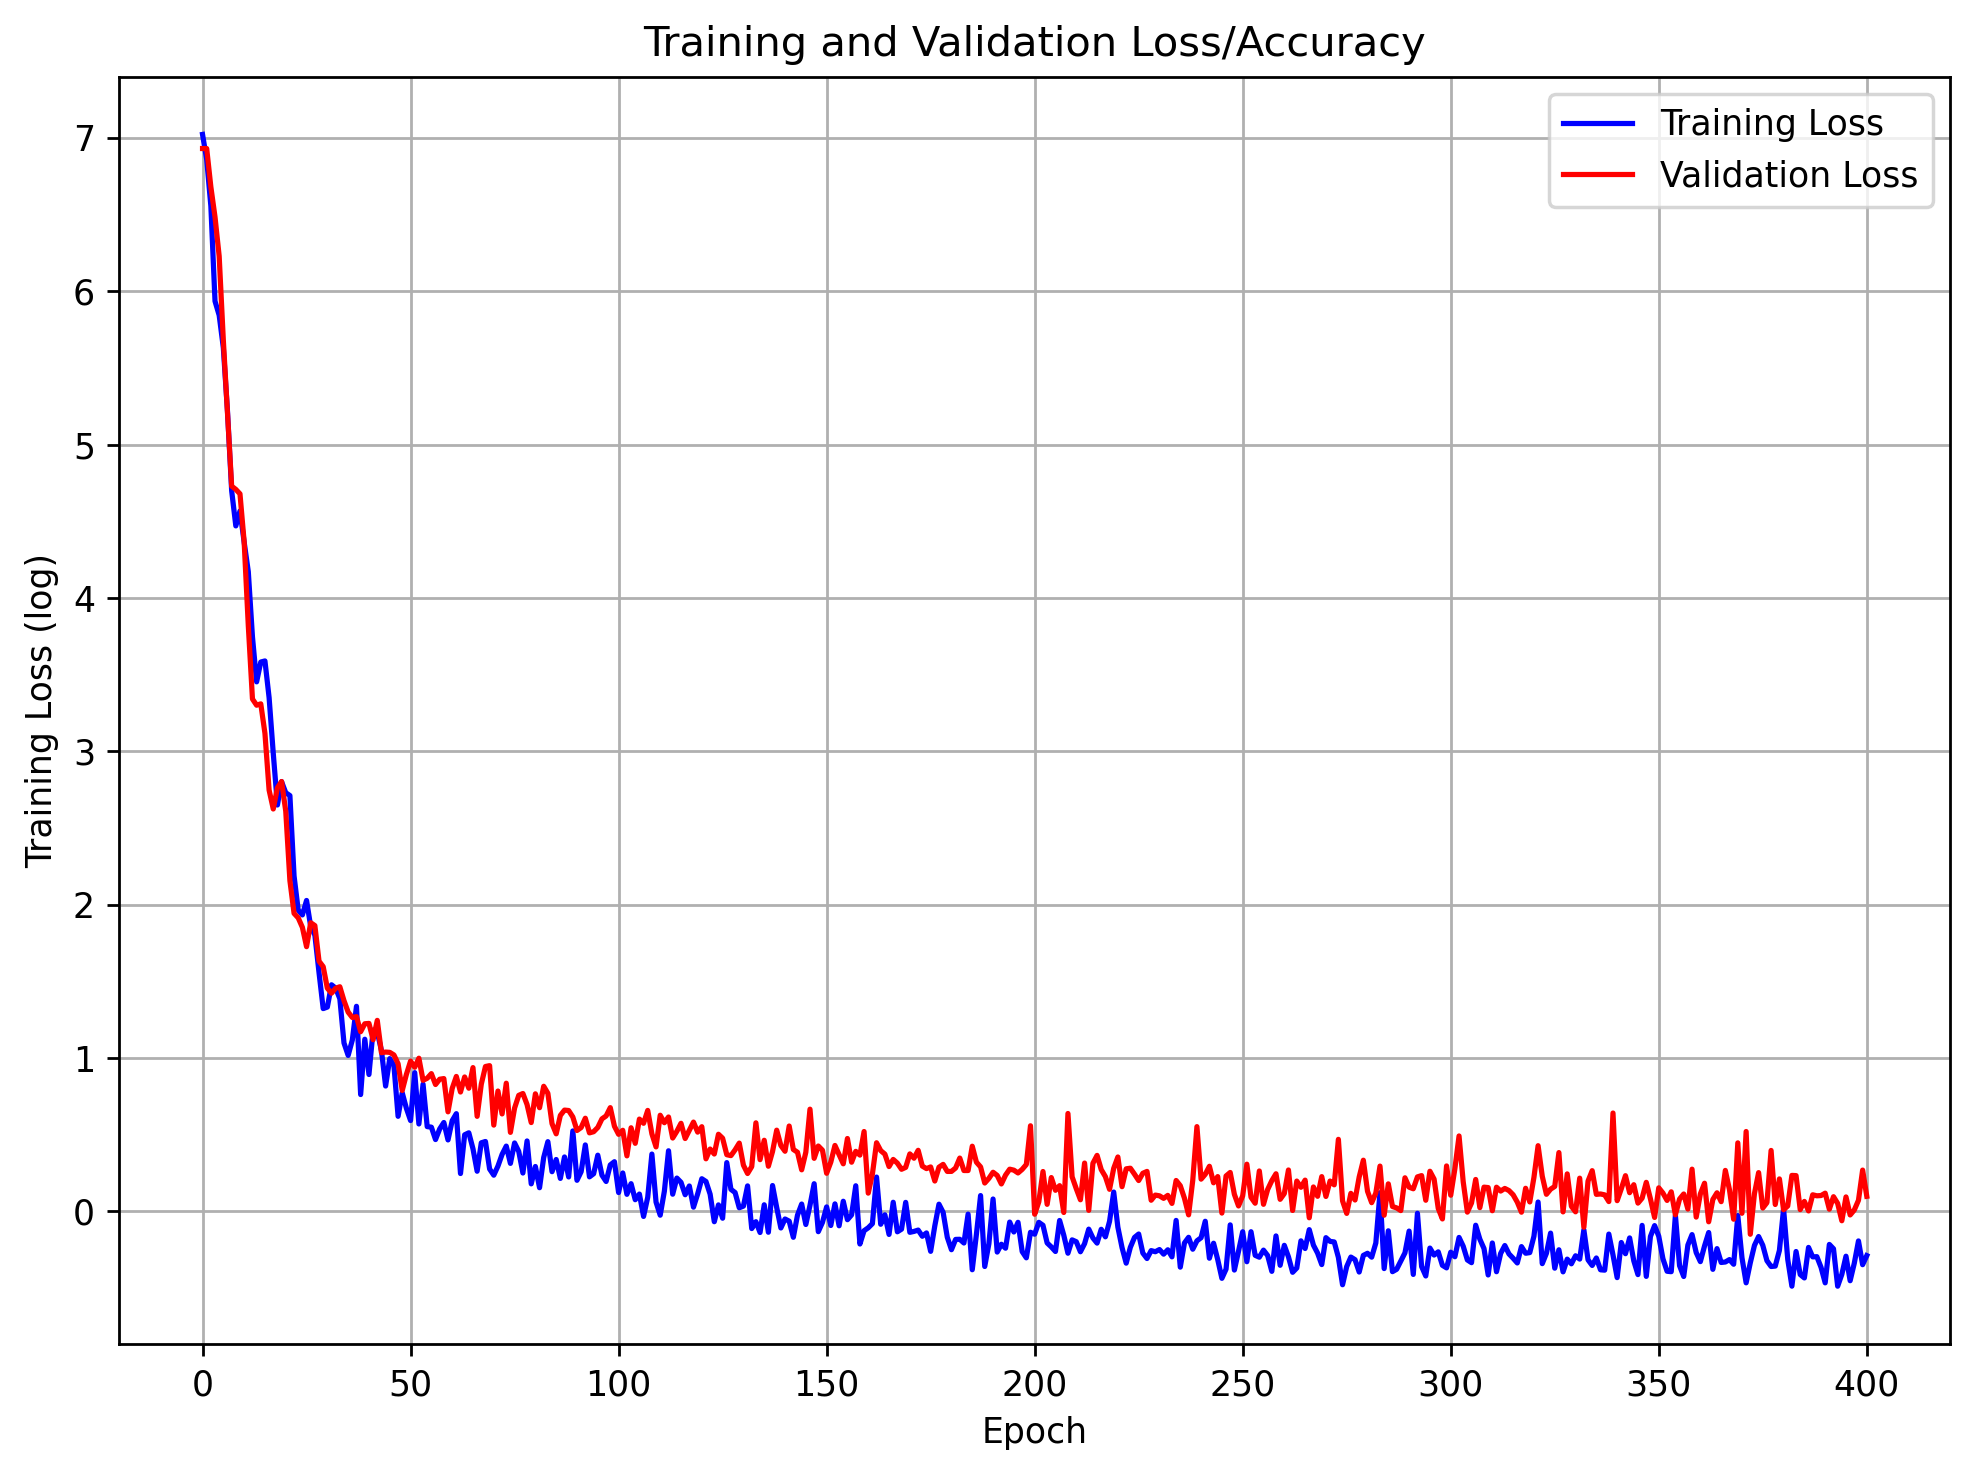

In [19]:
#NEW ONE!!

import matplotlib.pyplot as plt
import re
import numpy as np

# File path to your log file
#log_file_path = '/global/cfs/projectdirs/dune/www/data/2x2/simulation/silentc_work/point_mae/Point-MAE/experiments/edepsim_pretrain/cfgs/train_on_one_npy_file_acc/20231214_081354.log' # logg file for val on same image
log_file_path = '/global/cfs/projectdirs/dune/www/data/2x2/simulation/silentc_work/point_mae/Point-MAE/experiments/edepsim_pretrain/cfgs/train_on_one_npy_file_acc_diff/20231214_090938.log' # logg file for val on different image

# Lists to store extracted data
epochs = []
train_losses = []
val_losses = []
val_accuracy = []

# Regular expressions for extracting relevant information
epoch_pattern = re.compile(r'\[Epoch (\d+)/\d+\]')
train_loss_pattern = re.compile(r'Losses = \[\'(\d+\.\d+)\'\]')
val_loss_pattern = re.compile(r'Loss: (\d+\.\d+)')
val_acc_pattern = re.compile(r'Acc: (\d+\.\d+)')

count = 0  # Initialize count for train_losses

with open(log_file_path, 'r') as file:
    for line in file:
        epoch_match = epoch_pattern.search(line)
        if epoch_match:
            epochs.append(int(epoch_match.group(1)))

        train_loss_match = train_loss_pattern.search(line)
        if train_loss_match:
            count += 1
            if count % 2 == 0:  # Append only for every even occurrence
                train_losses.append(float(train_loss_match.group(1)))

        val_loss_match = val_loss_pattern.search(line)
        if val_loss_match:
            val_losses.append(float(val_loss_match.group(1)))

        val_acc_match = val_acc_pattern.search(line)
        if val_acc_match:
            val_accuracy.append(float(val_acc_match.group(1)))

# val starts at epoch 1, not zero   

val_losses.insert(0, val_losses[0])
val_accuracy.insert(0, val_accuracy[0])

print(len(epochs), len(train_losses), len(val_losses), len(val_accuracy))


# Compute logarithm of the data
log_train_losses = np.log(train_losses)
log_val_losses = np.log(val_losses)
log_val_accuracy = np.log(val_accuracy)

# Plotting
plt.figure(figsize=(8, 6), dpi=250)  # Set DPI to 250
ax1 = plt.gca()

# Plotting training loss
plot1, = ax1.plot(epochs, log_train_losses, linestyle='-', color='b', label='Training Loss')
# Plotting validation loss
plot2, = ax1.plot(epochs, log_val_losses, linestyle='-', color='r', label='Validation Loss')
#ax1.set_yscale('log')

ax1.set_xlabel('Epoch')
ax1.set_ylabel('Training Loss (log)')
ax1.set_title('Training and Validation Loss/Accuracy')

# Create a twin y-axis for validation acc
#ax2 = ax1.twinx()


# Plotting validation accuracy
#plot3, = ax2.plot(epochs, log_val_accuracy, linestyle='-', color='g', label='Validation Accuracy')
#ax2.set_yscale('log')
#ax2.set_ylabel('Validation Metrics')
#ax2.set_ylim(0, 1)

# Combine the legends from both axes
plots = [plot1, plot2]
labels = [plot.get_label() for plot in plots]
ax1.legend(plots, labels, loc='upper right')

plt.grid(True)
plt.tight_layout()
plt.show()

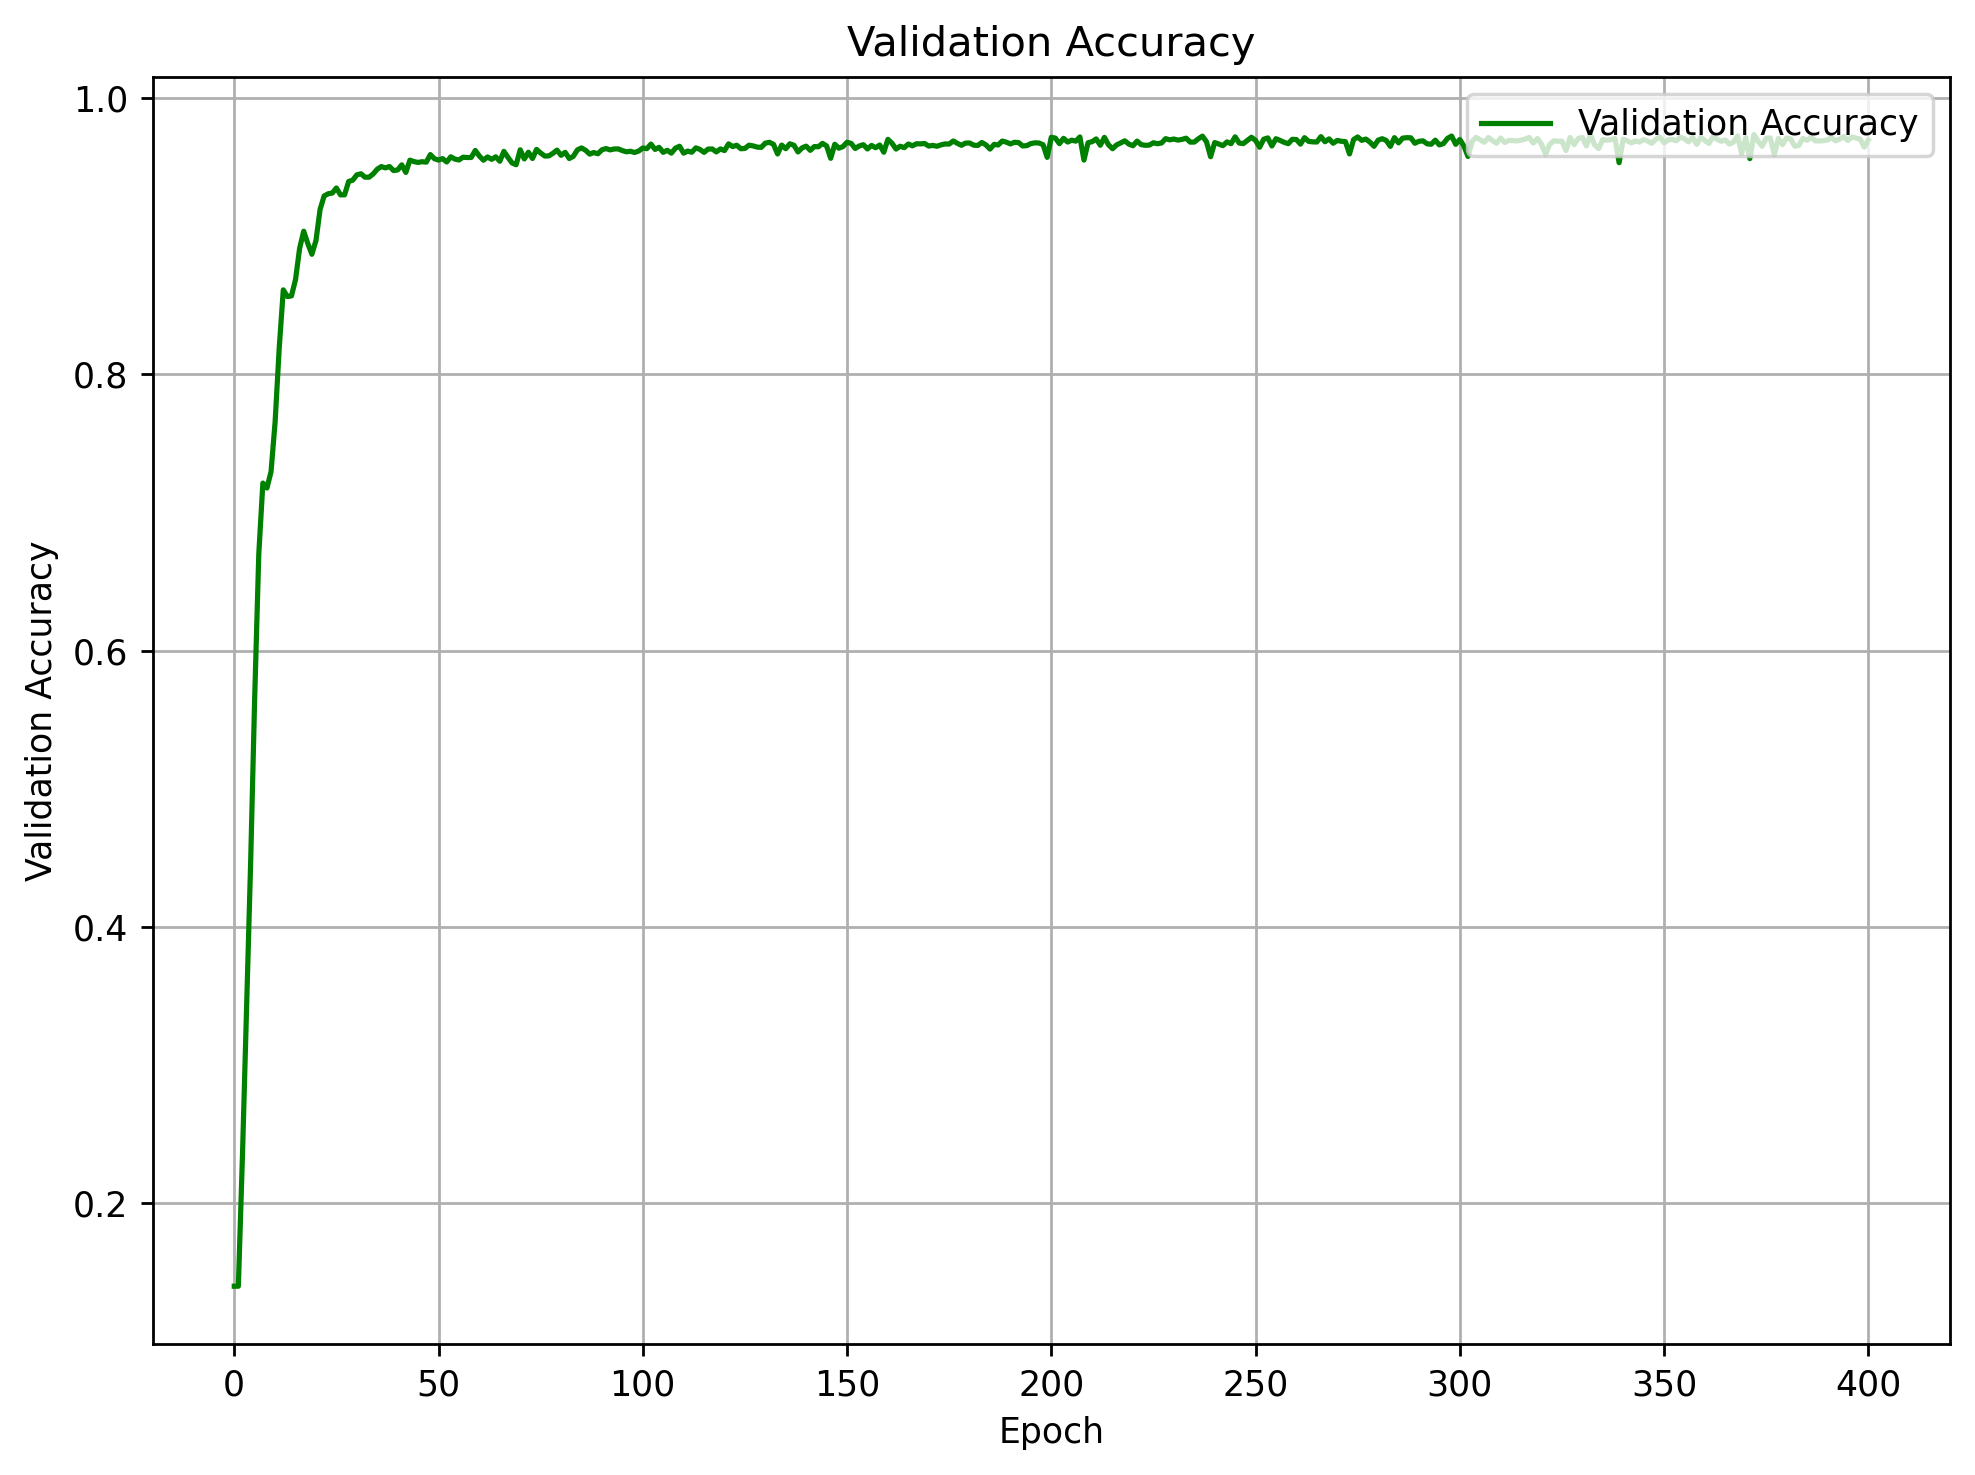

In [20]:
import matplotlib.pyplot as plt
import re
import numpy as np

# File path to your log file
#log_file_path = '/global/cfs/projectdirs/dune/www/data/2x2/simulation/silentc_work/point_mae/Point-MAE/experiments/edepsim_pretrain/cfgs/train_on_one_npy_file_acc/20231214_081354.log' # logg file for val on same image
log_file_path = '/global/cfs/projectdirs/dune/www/data/2x2/simulation/silentc_work/point_mae/Point-MAE/experiments/edepsim_pretrain/cfgs/train_on_one_npy_file_acc_diff/20231214_090938.log' # logg file for val on different image


# Lists to store extracted data
epochs = []
val_accuracy = []

# Regular expressions for extracting relevant information
epoch_pattern = re.compile(r'\[Epoch (\d+)/\d+\]')
val_acc_pattern = re.compile(r'Acc: (\d+\.\d+)')

with open(log_file_path, 'r') as file:
    for line in file:
        epoch_match = epoch_pattern.search(line)
        if epoch_match:
            epochs.append(int(epoch_match.group(1)))

        val_acc_match = val_acc_pattern.search(line)
        if val_acc_match:
            val_accuracy.append(float(val_acc_match.group(1)))

# val starts at epoch 1, not zero
val_accuracy.insert(0, val_accuracy[0])

# Compute logarithm of the data
log_val_accuracy = np.log(val_accuracy)

# Plotting
plt.figure(figsize=(8, 6), dpi=250)
ax1 = plt.gca()

# Plotting validation accuracy
#plot1, = ax1.plot(epochs, log_val_accuracy, linestyle='-', color='g', label='Validation Accuracy')
plot1, = ax1.plot(epochs, val_accuracy, linestyle='-', color='g', label='Validation Accuracy')

ax1.set_xlabel('Epoch')
ax1.set_ylabel('Validation Accuracy')
ax1.set_title('Validation Accuracy')

plt.legend([plot1], ['Validation Accuracy'], loc='upper right')
plt.grid(True)
plt.tight_layout()
plt.show()


In [14]:
print(val_accuracy)

[0.13695377111434937, 0.13695377111434937, 0.2503792643547058, 0.34947091341018677, 0.4576532542705536, 0.5655083656311035, 0.6658263206481934, 0.7256196737289429, 0.7275363206863403, 0.7382464408874512, 0.7672101259231567, 0.8249958753585815, 0.8642230033874512, 0.8561270236968994, 0.8583003282546997, 0.8745280504226685, 0.9029293060302734, 0.9129895567893982, 0.8982315063476562, 0.893597424030304, 0.9061352014541626, 0.9287801384925842, 0.941540539264679, 0.9401852488517761, 0.9375053644180298, 0.9396867752075195, 0.9407469034194946, 0.9425666332244873, 0.9491710066795349, 0.951749324798584, 0.9566385746002197, 0.9578577280044556, 0.9575678706169128, 0.9596311450004578, 0.9601607918739319, 0.9603356122970581, 0.9626098871231079, 0.9628448486328125, 0.9640793204307556, 0.9661524295806885, 0.9675717353820801, 0.9671727418899536, 0.966336190700531, 0.968015730381012, 0.9681683778762817, 0.971539318561554, 0.9729329347610474, 0.973202109336853, 0.9762837886810303, 0.9756437540054321, 0.9